# Nash Bargaining game 

**Table of contents**<a id='toc0_'></a>  

Imports and set magics:

In [73]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

from modelproject import NashBargainingClass
model = NashBargainingClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

We consider a simple Nash bargaining problem betweem two bargainers/players: $N = \{1,2\}$. In our case, the two players are a firm and a worker who bargain about splitting the productivity of the worker in a one shot game. The players either reach an agreement on the distribution of the surplus of the labour or fail to reach an agreement in which they receive the threat point $D=(d_1,d_2)$. $d_1$ can be thought for as unemployment benefit or the costs of searching for a job which the bargained wage has to exceed for the contract to be entered into. We assume that $d_2=0$ because of free entry and a large number of firms. 

The firm's utility function is defined as the profit after paying wage to the worker because we assume that labour is the only production input. $\theta$ is the value of labour in the form of productivity while $w\in [d_1,\theta]$ is the wage of the worker. We assume that both agents are risk neutral. The utility functions are thus presented as:
$$
\begin{aligned}
u_1(w) &= w \\
u_2(\theta, w) &= \theta - w \\
\end{aligned}
$$

The Nash bargaining problem includes asymmetry as we assume that the firm and the worker have have different bargaining power. Thus the worker and the firm shares the contract surplus dependent on their relative bargaining power reflected by $\alpha \in [0,1]$ conditional on the threat point. $\alpha$ is the bargaining power of the worker while the bargaining power of the firm is given by $1-\alpha$. 

If the axioms "Invariance to Equivalent Utility Representations", "Independence of Irrelevant Alternatives" and "Pareto Efficiency" are fulfilled the unique solution of the Nash baragining problem with asymmetry where $D=(d_1,0)$ is given by
$$
\begin{aligned}
f(u,d) &= \arg \max_{w} (u_1(w)-d_1)^\alpha (u_2(\theta,w)-d_2)^{1-\alpha}  \\
&= \arg \max_w (w-d_1)^\alpha(\theta-w)^{1-\alpha}\\
\end{aligned}
$$

## Analytical solution

We find the analytical solution of the model by characterizing the solution as a function of the parameters of the model:

In [80]:
analyticalsolution = sm.Eq(model.par.w,model.analyticalsolution())
analyticalsolution

Eq(w, alpha*theta + d1*(1 - alpha))

The wage is the weighted average of the productivity, $\theta$, and the workers' threat point where the weights are the bargaining power of the firm and the worker, respectively. 

## Numerical solution

Now we solve the model numerically. 
For the numerical solution we assume that $\theta=60$, $d_1 = 10$, $d_2 = 0$ and $\alpha = 1/3$.

In [83]:
numericalsolution = model.numericalsolution()
print(numericalsolution)

w = 26.7


We look at how the wage changes when $\alpha$ changes:

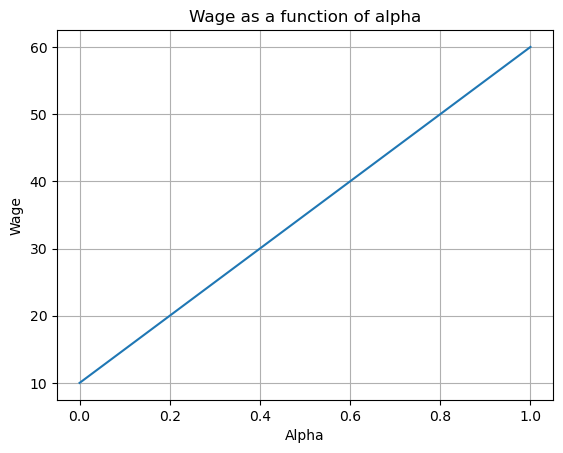

In [76]:
model.varyingalpha()
#Plot løsningen ovenfra som en prik i figuren

As $\alpha$ changes the wage varies within the bounds of $\theta$ and $d_1$. When $\alpha=0$ the firm receives all the surplus of the contract as the wage becomes equal to the worker's minimum required wage, $w^{min}=d_1=10$. The wage is an increasing function of the worker's bargaining power, $\alpha$. In the limiting case where $\alpha=1$ the wage equals the maximum wage the firm can offer such that the profit is not negative which is equal to the value of labour, $w^{max}=\theta=60$. 

In the our numerical solution where $\alpha=1/3$ the wage is relatively low, $w=26.7$, because of the low bargaining power of the worker expressed by $\alpha$ and the relatively low threat point, $d_1=10$.

# Further analysis

We simulate a wage distribution of 10000 individuals whose wages are determined by the one shot Nash bargaining model. It is again assumed that $d_1=10$, $d_2=0$ and $\alpha = 1/3$. However, now productivity values of the individuals are drawn from a normal distribution with mean 60 and standard deviation of 10.

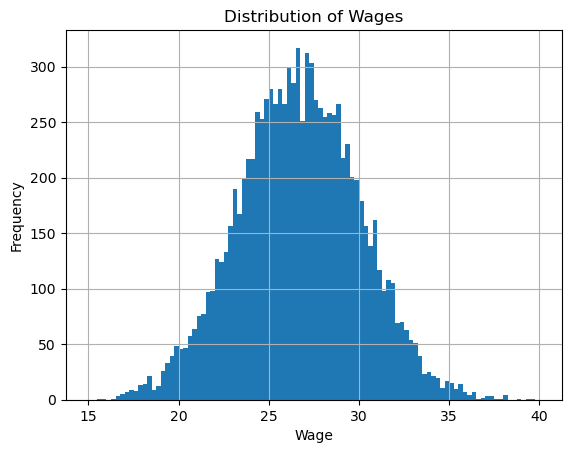

In [77]:
model.simulatewdistribution()

#Skriv en kommentar til figuren

Now we introduce a minimum wage, $m=20$. It is assumed that this does not affect the threat point which is exogenous. The minimum wage is introduced as a constraint in the maximization problem above such that $w\in [m, \theta]$.

For contracts where the productivity exceeds the minimum wage the wage distribution becomes:

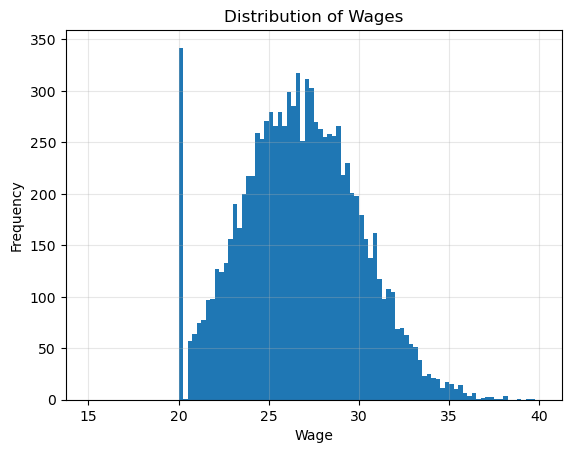

In [85]:
model.minimumwage()

For contracts where $\theta < m$ it is no longer profitable for the firm to hire the worker so here no wage will be agreed on. In cases where the minimum wage is not binding (where the wage without the minimum wage already exceeds the minimum wage) the axiom of Independence of Irrelevant Alternatives means that the Nash bargaining solution is unchanged. For workers where $\theta ≥ m$ and the minimum wage is binding the wage is raised (compared to the case without a minimum wage) to equal $m$. So we see that the minimum wage causes clear bunching in the distribution of wages as illustrated above and no wages below the minimum bound. 

# Conclusion

Add concise conclusion. 

A minimum wage causes less contracts to be entered into but some wages are raised. 